In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statistics import median
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error


from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve  

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge,RidgeCV, LassoCV, BayesianRidge,ElasticNet,ElasticNetCV

from sklearn import preprocessing  
from numpy import median
import itertools 

from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.impute import KNNImputer   
from pandas.plotting import scatter_matrix  

from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score 
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 100
from sklearn.metrics import mean_absolute_error as mae
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
import statsmodels.formula.api as sm
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import lime
import lime.lime_tabular

In [2]:
df=pd.read_csv("cleaneddata.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   981 non-null    object 
 1   city                  981 non-null    object 
 2   state                 981 non-null    object 
 3   street_address        981 non-null    object 
 4   zipcode               981 non-null    int64  
 5   bed                   981 non-null    float64
 6   bath                  981 non-null    float64
 7   sqft                  981 non-null    float64
 8   lotsize               981 non-null    float64
 9   price                 981 non-null    float64
 10  property_type         981 non-null    object 
 11  hoa_monthly           359 non-null    float64
 12  price_per_sqft        981 non-null    float64
 13  parking_space         790 non-null    float64
 14  year                  978 non-null    float64
 15  median_home_price     8

In [4]:
df.describe()

,zipcode,bed,bath,sqft,lotsize,price,hoa_monthly,price_per_sqft,parking_space,year,median_home_price,median_selling_price,mhp_per_sqft
count,981.00,981.00,981.00,981.00,981.00,981.00,359.00,981.00,790.00,978.00,828.00,753.00,828.00
mean,94583.36,3.33,2.30,1725.45,4459.59,1425050.91,306.92,836.01,1.94,1971.18,1399520.30,1376120.32,836.05
std,276.24,0.80,0.43,515.06,2843.39,537351.85,264.83,243.28,0.48,24.97,518639.72,490310.67,196.08
min,94085.00,2.00,1.50,683.00,0.23,389000.00,1.00,216.00,1.00,1888.00,598888.00,495000.00,522.00
25%,94538.00,3.00,2.00,1312.00,1932.00,998000.00,103.00,668.00,2.00,1958.00,998000.00,945000.00,710.00
50%,94546.00,3.00,2.00,1674.00,5096.00,1359000.00,275.00,795.00,2.00,1971.50,1301500.00,1350000.00,798.00
75%,94587.00,4.00,2.50,2055.00,6503.00,1749000.00,427.50,968.00,2.00,1988.00,1614000.00,1575000.00,939.00
max,95148.00,5.00,3.00,3531.00,9968.00,3098888.00,2557.00,1804.00,6.00,2023.00,5747500.00,3050000.00,1905.00


In [5]:
df['price'].describe()

count       981.00
mean    1425050.91
std      537351.85
min      389000.00
25%      998000.00
50%     1359000.00
75%     1749000.00
max     3098888.00
Name: price, dtype: float64

In [6]:
df.columns

Index(['url', 'city', 'state', 'street_address', 'zipcode', 'bed', 'bath',
       'sqft', 'lotsize', 'price', 'property_type', 'hoa_monthly',
       'price_per_sqft', 'parking_space', 'year', 'median_home_price',
       'median_selling_price', 'mhp_per_sqft', 'school_district', 'broker'],
      dtype='object')

In [7]:
cr = df.corr()
correlated=cr["price"].sort_values(ascending=False)
correlated=pd.DataFrame(correlated)
correlated

,price
price,1.00
sqft,0.64
price_per_sqft,0.64
median_home_price,0.63
median_selling_price,0.61
mhp_per_sqft,0.57
bed,0.44
bath,0.35
parking_space,0.32
lotsize,0.26


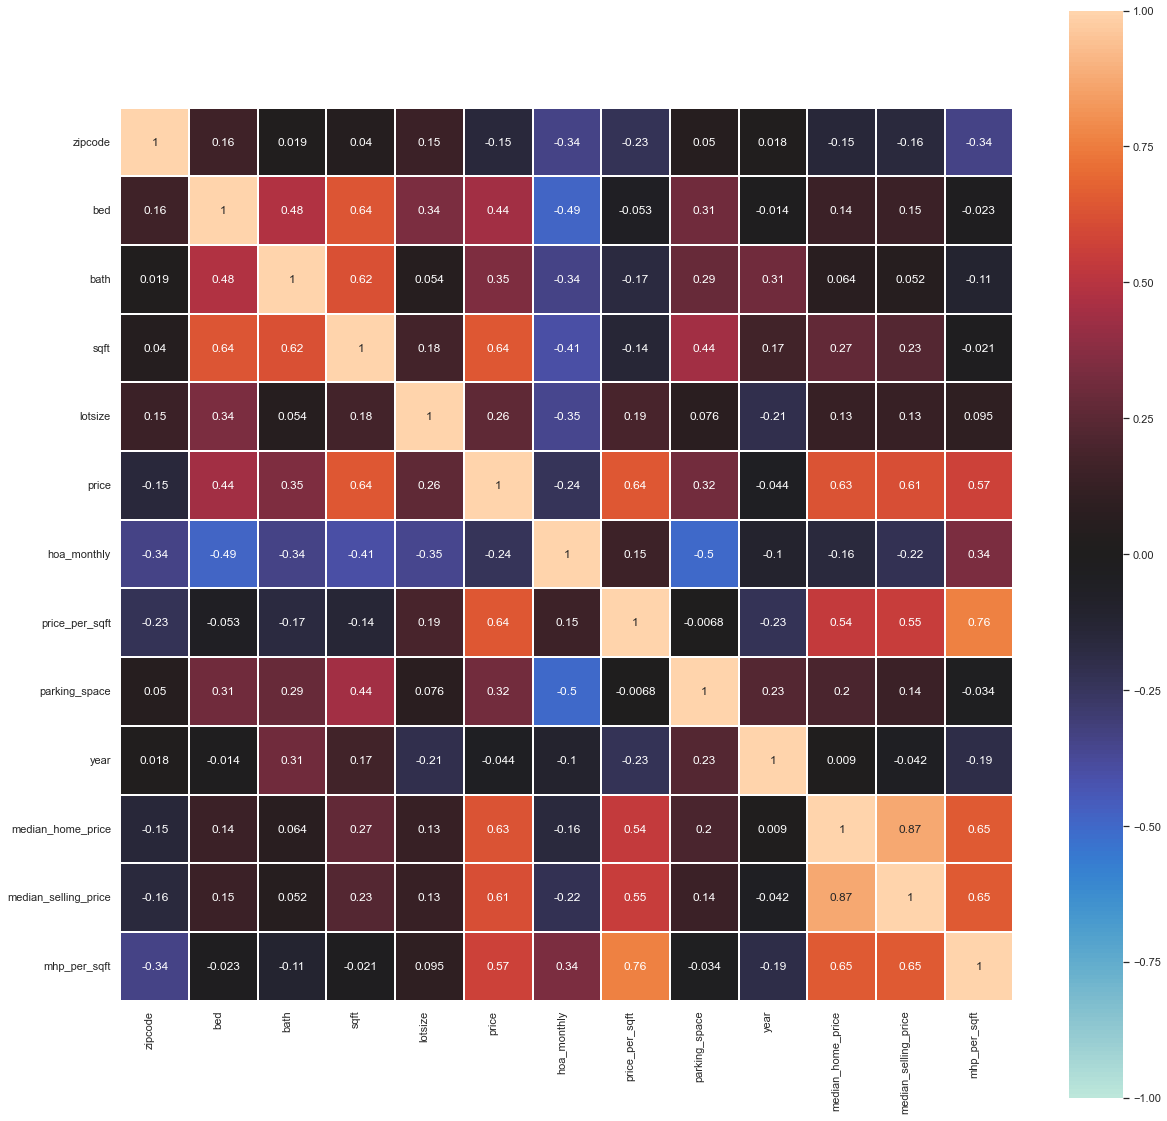

In [8]:
## correlation graph:

corr = df.corr()
sns.set(rc = {'figure.figsize':(20,20)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot = True,linewidths=.2
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

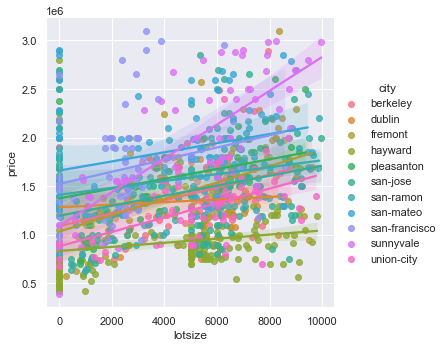

In [9]:
sns.lmplot(x = 'lotsize', y = 'price', data=df, hue = 'city')
sns.set(rc = {'figure.figsize':(10,10)})
plt.xlabel('lotsize')
plt.ylabel('price')
plt.show()

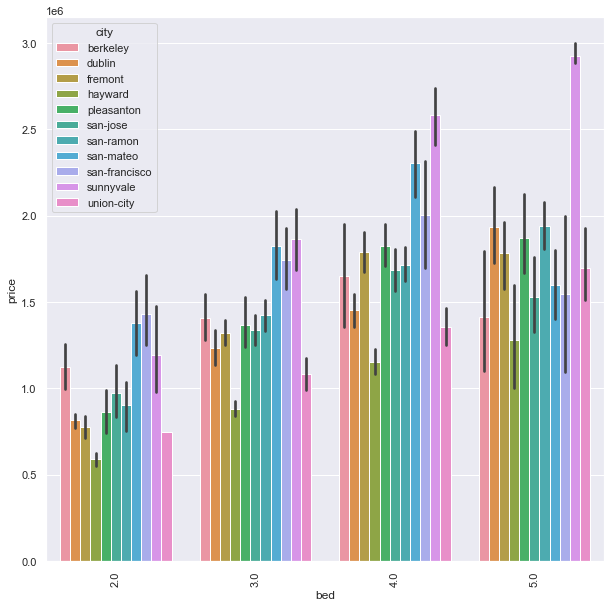

In [10]:
sns.barplot(x = "bed", y = "price", data=df, hue = "city")
sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(rotation=90)
plt.show()

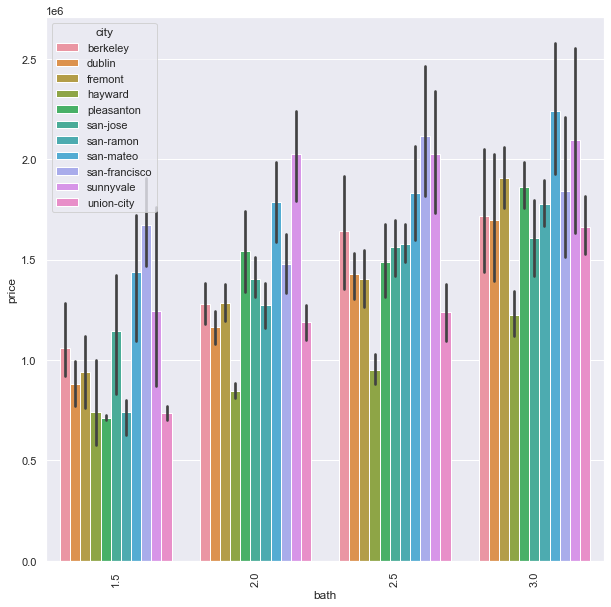

In [11]:
sns.barplot(x = "bath", y = "price", data=df, hue = "city")
sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(rotation=90)
plt.show()

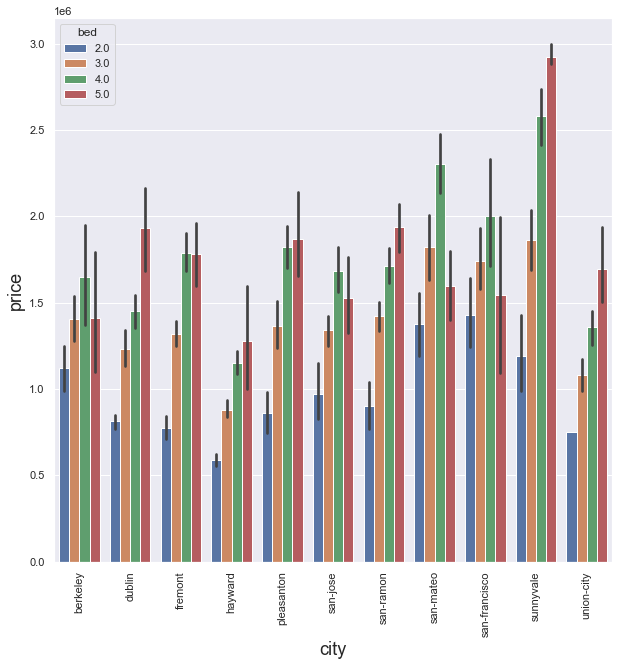

In [12]:
sns.barplot(x = "city", y = "price", data=df, hue = "bed")
sns.set(rc = {'figure.figsize':(15,15)})
plt.xticks(rotation=90)
plt.xlabel('city', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.show()

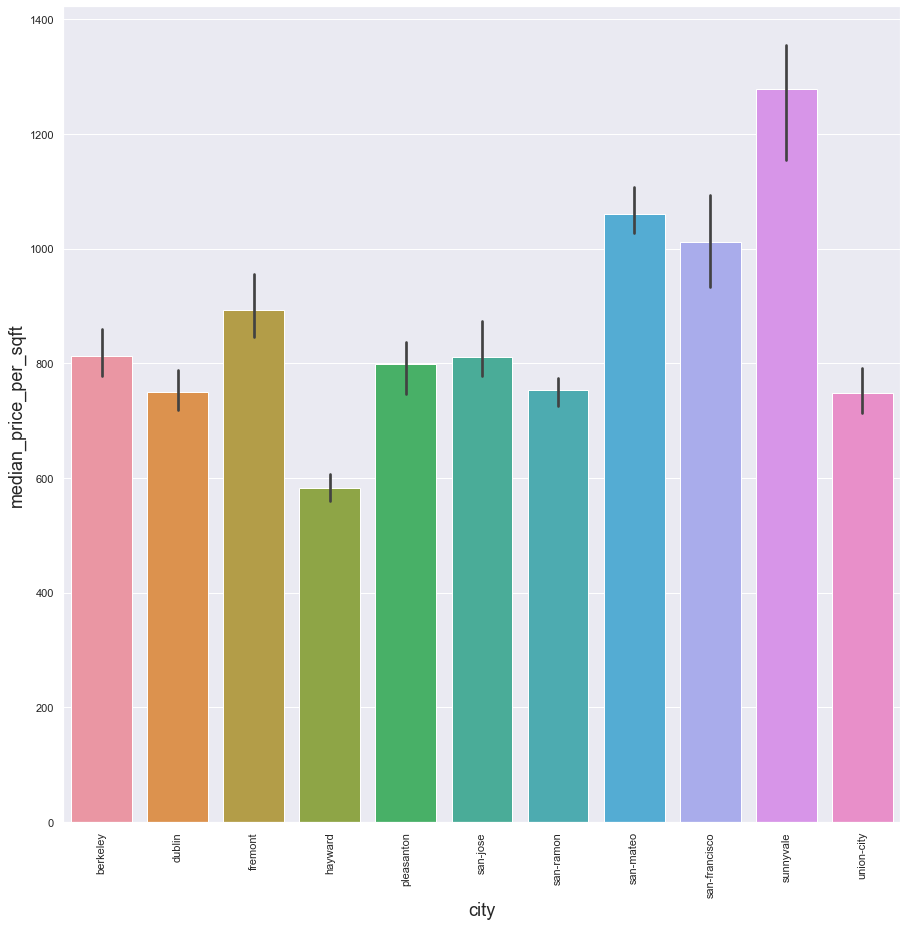

In [13]:
sns.barplot(x = "city", y = "price_per_sqft", data=df, estimator =median)
sns.set(rc = {'figure.figsize':(15,15)})
plt.xticks(rotation=90)
plt.xlabel('city', fontsize=18)
plt.ylabel('median_price_per_sqft', fontsize=18)
plt.show()

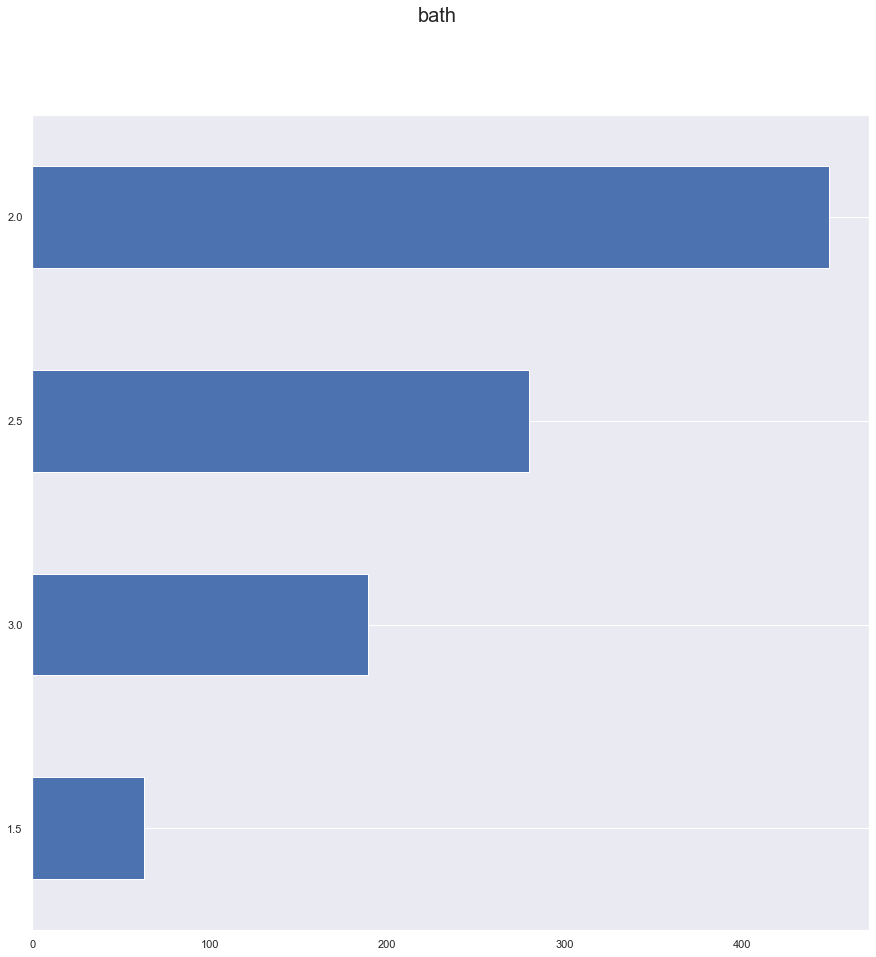

In [14]:
x = "bath"
ax = df[x].value_counts().sort_values().plot(kind="barh")
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

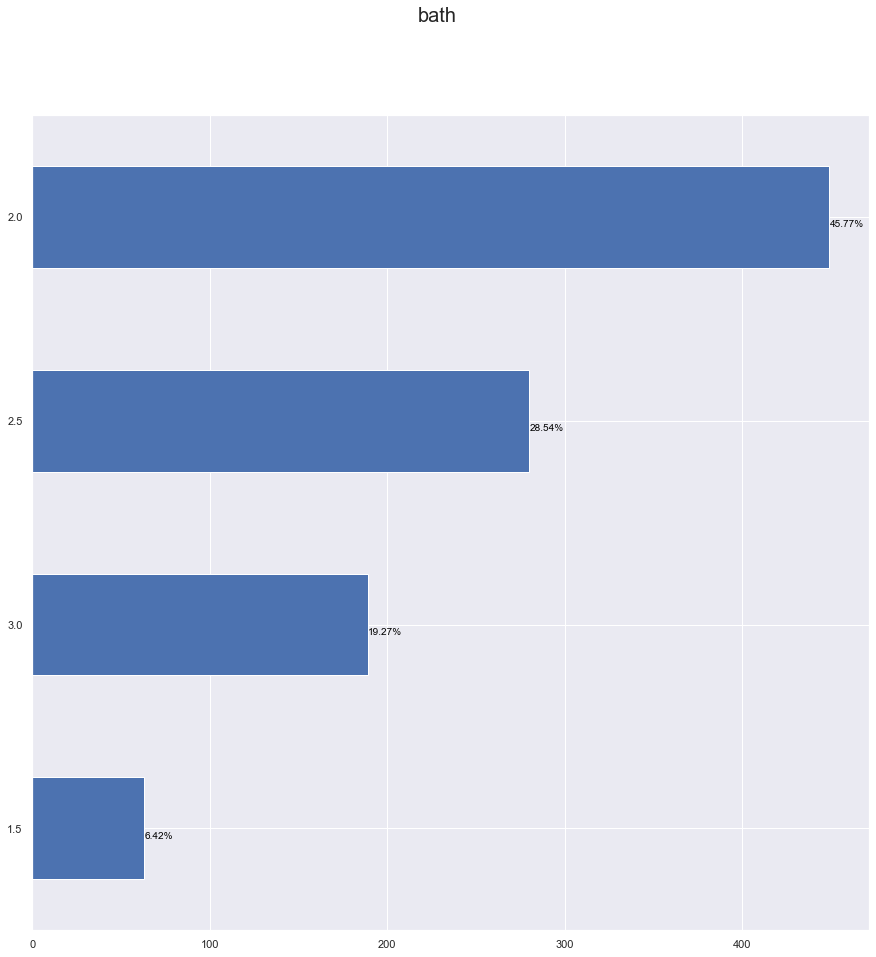

In [15]:
x = "bath"
ax = df[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.suptitle(x, fontsize=20)
plt.show()

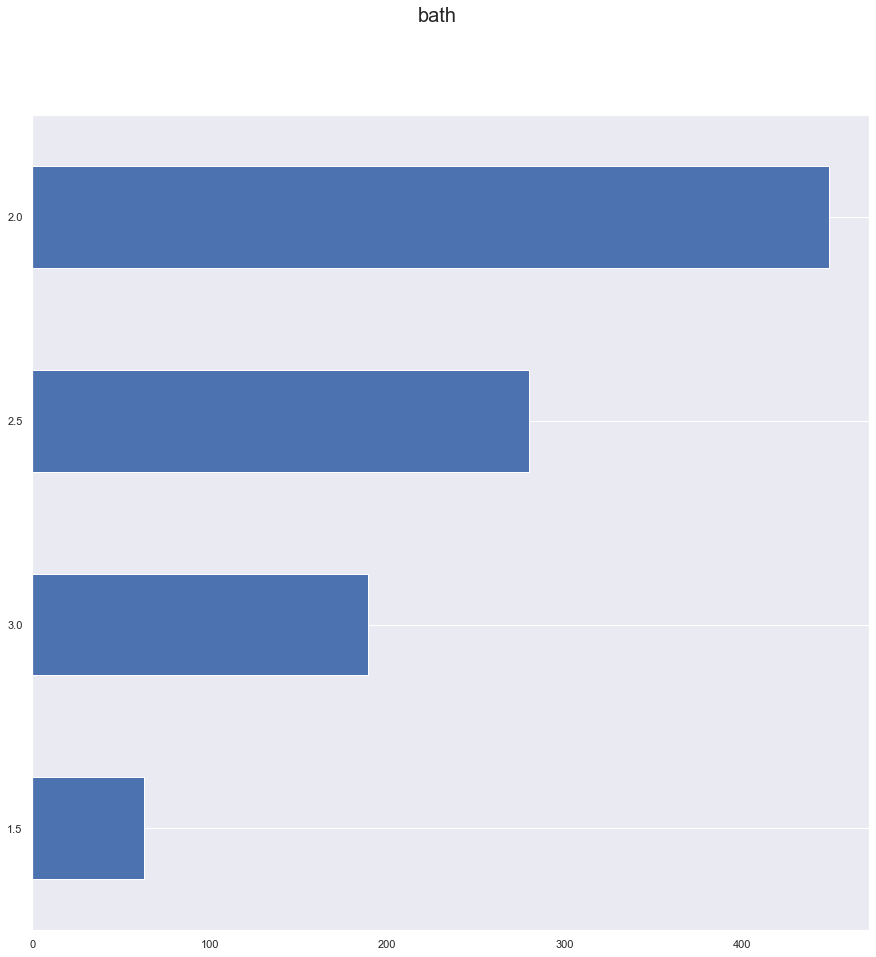

In [16]:
x = "bath"
ax = df[x].value_counts().sort_values().plot(kind="barh")
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

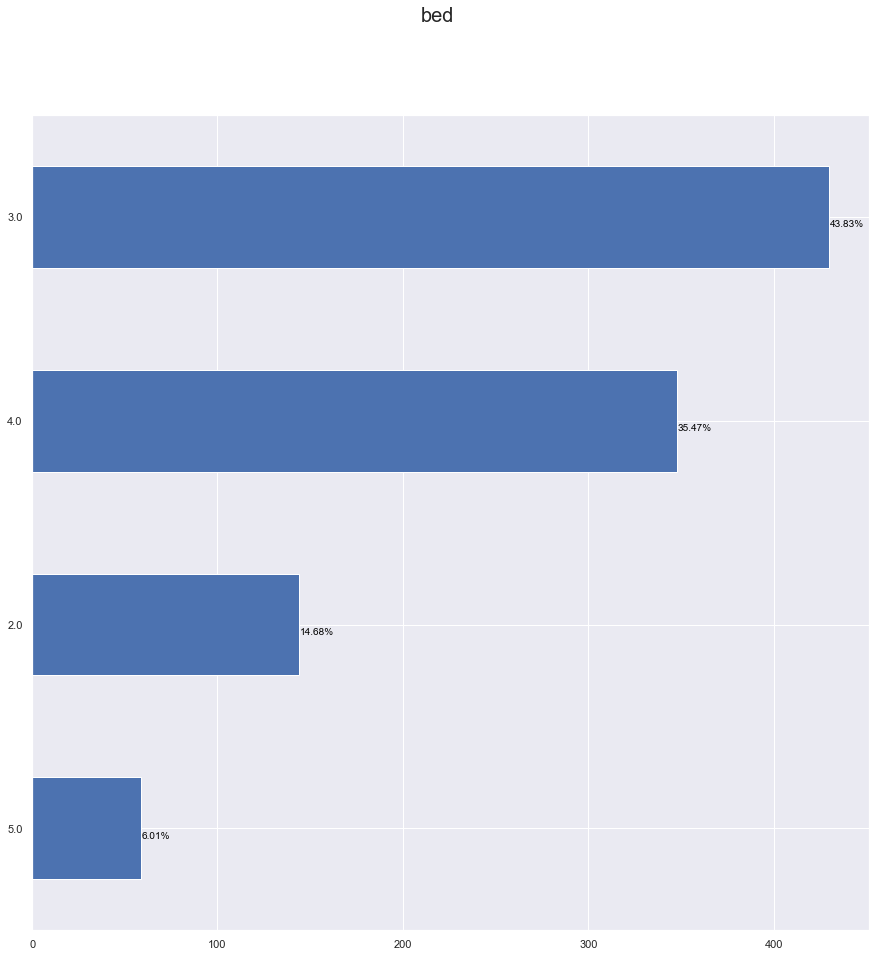

In [17]:
x = "bed"
ax = df[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.suptitle(x, fontsize=20)
plt.show()

In [18]:
df.columns

Index(['url', 'city', 'state', 'street_address', 'zipcode', 'bed', 'bath',
       'sqft', 'lotsize', 'price', 'property_type', 'hoa_monthly',
       'price_per_sqft', 'parking_space', 'year', 'median_home_price',
       'median_selling_price', 'mhp_per_sqft', 'school_district', 'broker'],
      dtype='object')

In [19]:
df = df.drop('url', axis=1)

In [20]:
df.columns

Index(['city', 'state', 'street_address', 'zipcode', 'bed', 'bath', 'sqft',
       'lotsize', 'price', 'property_type', 'hoa_monthly', 'price_per_sqft',
       'parking_space', 'year', 'median_home_price', 'median_selling_price',
       'mhp_per_sqft', 'school_district', 'broker'],
      dtype='object')

In [81]:
df.dtypes

city                            object
state                           object
street_address                  object
zipcode                          int64
bed                            float64
bath                           float64
sqft                           float64
lotsize                        float64
price                          float64
hoa_monthly                    float64
price_per_sqft                 float64
parking_space                  float64
year                           float64
median_home_price              float64
median_selling_price           float64
mhp_per_sqft                   float64
school_district                 object
broker                          object
property_type_condo              int64
property_type_mfd/mobile         int64
property_type_multi-family       int64
property_type_single_family      int64
property_type_townhome           int64
dtype: object

In [22]:
## one-hot encoding:

columnlst = ['property_type']
for i in columnlst:
    df[i] = df[i].astype('category')
    print(df[i].cat.categories)
    print(df[i].dtype)
    
one_hot_property_type = pd.get_dummies(df['property_type'], prefix = 'property_type', prefix_sep ='_', 
                            drop_first=False)

Index(['condo', 'mfd/mobile', 'multi-family', 'single family', 'townhome'], dtype='object')
category


In [23]:
df_regression = pd.concat([df.drop(['property_type'],axis = 1), one_hot_property_type], axis = 1)

In [24]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         981 non-null    object 
 1   state                        981 non-null    object 
 2   street_address               981 non-null    object 
 3   zipcode                      981 non-null    int64  
 4   bed                          981 non-null    float64
 5   bath                         981 non-null    float64
 6   sqft                         981 non-null    float64
 7   lotsize                      981 non-null    float64
 8   price                        981 non-null    float64
 9   hoa_monthly                  359 non-null    float64
 10  price_per_sqft               981 non-null    float64
 11  parking_space                790 non-null    float64
 12  year                         978 non-null    float64
 13  median_home_price   

In [25]:
print('Modified column titles with no space and one word for titles:')
df_regression.columns = [s.strip().replace(' ', '_') for s in df_regression.columns]
df_regression.columns

Modified column titles with no space and one word for titles:


Index(['city', 'state', 'street_address', 'zipcode', 'bed', 'bath', 'sqft',
       'lotsize', 'price', 'hoa_monthly', 'price_per_sqft', 'parking_space',
       'year', 'median_home_price', 'median_selling_price', 'mhp_per_sqft',
       'school_district', 'broker', 'property_type_condo',
       'property_type_mfd/mobile', 'property_type_multi-family',
       'property_type_single_family', 'property_type_townhome'],
      dtype='object')

In [26]:
df_regression["parking_space"].isnull().sum()
df_regression["parking_space"].fillna(df["parking_space"].mean(), inplace = True)
df_regression["parking_space"].isnull().sum()

0

In [27]:
df["median_home_price"].isnull().sum()
df["median_home_price"].fillna(df["median_home_price"].median(), inplace = True)
df["median_home_price"].isnull().sum()

0

In [28]:
df_regression["median_selling_price"].isnull().sum()
df_regression["median_selling_price"].fillna(df["median_selling_price"].median(), inplace = True)
df_regression["median_selling_price"].isnull().sum()

0

In [29]:
df_regression["mhp_per_sqft"].isnull().sum()
df_regression["mhp_per_sqft"].fillna(df["mhp_per_sqft"].median(), inplace = True)
df_regression["mhp_per_sqft"].isnull().sum()

0

In [30]:
df_regression["hoa_monthly"].isnull().sum()
df_regression["hoa_monthly"].fillna(df["hoa_monthly"].median(), inplace = True)
df_regression["hoa_monthly"].isnull().sum()

0

In [31]:
df_regression["year"].isnull().sum()
df_regression["year"].fillna(df["year"].mean(), inplace = True)
df_regression["year"].isnull().sum()

0

In [32]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         981 non-null    object 
 1   state                        981 non-null    object 
 2   street_address               981 non-null    object 
 3   zipcode                      981 non-null    int64  
 4   bed                          981 non-null    float64
 5   bath                         981 non-null    float64
 6   sqft                         981 non-null    float64
 7   lotsize                      981 non-null    float64
 8   price                        981 non-null    float64
 9   hoa_monthly                  981 non-null    float64
 10  price_per_sqft               981 non-null    float64
 11  parking_space                981 non-null    float64
 12  year                         981 non-null    float64
 13  median_home_price   

In [33]:
df_regression.to_csv('Data_Analysis_Pt2.csv', index = False)

In [63]:
df=pd.read_csv('Data_Analysis_Pt2.csv')

In [64]:
df.columns

Index(['city', 'state', 'street_address', 'zipcode', 'bed', 'bath', 'sqft',
       'lotsize', 'price', 'hoa_monthly', 'price_per_sqft', 'parking_space',
       'year', 'median_home_price', 'median_selling_price', 'mhp_per_sqft',
       'school_district', 'broker', 'property_type_condo',
       'property_type_mfd/mobile', 'property_type_multi-family',
       'property_type_single_family', 'property_type_townhome'],
      dtype='object')

In [65]:
predictors=['zipcode', 'lotsize', 'parking_space', 'year', 'property_type_condo',
       'property_type_multi-family', 'property_type_single_family']
outcome='price'

In [66]:
X=df[predictors]
y=df[outcome]

In [67]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state=3,test_size=0.25)

In [68]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(train_X, valid_X, train_y, valid_y)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:01<00:00, 27.27it/s]

                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
LGBMRegressor                                0.60       0.61   346549.87   
HistGradientBoostingRegressor                0.59       0.60   351616.39   
ExtraTreesRegressor                          0.58       0.59   354512.17   
GradientBoostingRegressor                    0.58       0.59   354810.15   
RandomForestRegressor                        0.57       0.59   358376.49   
XGBRegressor                                 0.54       0.56   370127.10   
BaggingRegressor                             0.51       0.52   384116.68   
KNeighborsRegressor                          0.49       0.50   392404.54   
AdaBoostRegressor                            0.34       0.36   444359.47   
ExtraTreeRegressor                           0.34       0.36   444583.89   
PoissonRegressor                             0.28       0.30   466624.89   
LassoLarsIC 

In [69]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, XGB_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [73]:
##Linear Regression:
LR_price = LinearRegression()
LR_price.fit(train_X, train_y)
LR_price_pred = LR_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': LR_price_pred, 
                       'Residual': valid_y - LR_price_pred}), 2)
print(result.head(15))
print(rmse(LR_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, LR_price_pred)

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1572321.92 -234321.92
194 1999888.00 1634663.37  365224.63
620 1798000.00 1284527.44  513472.56
58  1649000.00 1599835.78   49164.22
415  965000.00  779070.87  185929.13
825 1698000.00 1425847.02  272152.98
525 1150777.00 1339779.10 -189002.10
201 1799000.00 1610410.92  188589.08
157 1199000.00 1580640.87 -381640.87
639 1188000.00 1030691.98  157308.02
846 2349000.00 1663618.57  685381.43
676 2199000.00 1921017.50  277982.50
103  950000.00 1034399.35  -84399.35
680 2170000.00 1628433.22  541566.78
749 1338000.00 1099643.80  238356.20
R-squared: 0.293073338958433
Mean Squared Error: 370450.0452414826
None


361301.5627240737

In [82]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, LGBM_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [83]:
##LGBM Regressor:
import lightgbm as ltb
LGBM_price = ltb.LGBMRegressor()
LGBM_price.fit(train_X, train_y)
LGBM_price_pred = LGBM_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': LGBM_price_pred, 
                       'Residual': valid_y - LGBM_price_pred}), 2)
print(result.head(15))
print(rmse(LGBM_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, LGBM_price_pred)

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1408745.73  -70745.73
194 1999888.00 2227334.18 -227446.18
620 1798000.00 1663084.64  134915.36
58  1649000.00 1554768.42   94231.58
415  965000.00  803352.68  161647.32
825 1698000.00 2115272.60 -417272.60
525 1150777.00 1556516.98 -405739.98
201 1799000.00 1729419.56   69580.44
157 1199000.00 1436020.70 -237020.70
639 1188000.00  934599.73  253400.27
846 2349000.00 1594359.14  754640.86
676 2199000.00 2140271.52   58728.48
103  950000.00 1231240.29 -281240.29
680 2170000.00 1817334.00  352666.00
749 1338000.00 1426044.20  -88044.20
R-squared: 0.6075343069342829
Mean Squared Error: 348655.0167650648
None


244612.63722140118

In [84]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, ETR_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [85]:
##ExtraTreesRegressor:
from sklearn.ensemble import ExtraTreesRegressor
ETR_price = ExtraTreesRegressor()
ETR_price.fit(train_X, train_y)
ETR_price_pred = ETR_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': ETR_price_pred, 
                       'Residual': valid_y - ETR_price_pred}), 2)
print(result.head(15))
print(rmse(ETR_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, ETR_price_pred)

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1529230.00 -191230.00
194 1999888.00 1699743.74  300144.26
620 1798000.00 1697680.80  100319.20
58  1649000.00 1478799.45  170200.55
415  965000.00  788170.80  176829.20
825 1698000.00 1525663.88  172336.12
525 1150777.00 1740758.42 -589981.42
201 1799000.00 1840557.00  -41557.00
157 1199000.00 1373162.94 -174162.94
639 1188000.00 1082327.61  105672.39
846 2349000.00 1390659.97  958340.03
676 2199000.00 1811917.42  387082.58
103  950000.00 1022041.09  -72041.09
680 2170000.00 1855420.00  314580.00
749 1338000.00 1188531.73  149468.27
R-squared: 0.5915373985066905
Mean Squared Error: 355689.64208599715
None


258352.19796747967

In [86]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, RFR_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [87]:
##RandomForestRegressor:
from sklearn.ensemble import RandomForestRegressor
RFR_price = RandomForestRegressor()
RFR_price.fit(train_X, train_y)
RFR_price_pred = RFR_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': RFR_price_pred, 
                       'Residual': valid_y - RFR_price_pred}), 2)
print(result.head(15))
print(rmse(RFR_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, RFR_price_pred)

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1383379.00  -45379.00
194 1999888.00 2006292.16   -6404.16
620 1798000.00 1753399.76   44600.24
58  1649000.00 1470032.68  178967.32
415  965000.00  784800.21  180199.79
825 1698000.00 1947510.00 -249510.00
525 1150777.00 1543281.72 -392504.72
201 1799000.00 1687571.00  111429.00
157 1199000.00 1515472.56 -316472.56
639 1188000.00  945398.62  242601.38
846 2349000.00 1536587.75  812412.25
676 2199000.00 1906602.94  292397.06
103  950000.00  932310.75   17689.25
680 2170000.00 1850918.00  319082.00
749 1338000.00 1395056.96  -57056.96
R-squared: 0.5864631847793949
Mean Squared Error: 357892.13814994076
None


254120.5703348174

In [88]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, BR_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [89]:
##BaggingRegressor:
from sklearn.ensemble import BaggingRegressor
BR_price = BaggingRegressor()
BR_price.fit(train_X, train_y)
BR_price_pred = BR_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': BR_price_pred, 
                       'Residual': valid_y - BR_price_pred}), 2)
print(result.head(15))
print(rmse(BR_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, BR_price_pred)

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1199900.00  138100.00
194 1999888.00 2018700.00  -18812.00
620 1798000.00 1847888.80  -49888.80
58  1649000.00 1594800.00   54200.00
415  965000.00  723790.00  241210.00
825 1698000.00 1599400.00   98600.00
525 1150777.00 1539100.00 -388323.00
201 1799000.00 1677260.00  121740.00
157 1199000.00 1670183.80 -471183.80
639 1188000.00  833688.00  354312.00
846 2349000.00 1577100.00  771900.00
676 2199000.00 1957377.60  241622.40
103  950000.00  939179.40   10820.60
680 2170000.00 1972600.00  197400.00
749 1338000.00 1201980.00  136020.00
R-squared: 0.5484022813085616
Mean Squared Error: 373999.42852427653
None


266350.88732446416

In [90]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, GBR_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [91]:
#GradientBoosting Regressor
GBR_price = GradientBoostingRegressor()
GBR_price.fit(train_X, train_y)
GBR_price_pred = GBR_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': GBR_price_pred, 
                       'Residual': valid_y - GBR_price_pred}), 2)
print(result.head(15))
print(rmse(GBR_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, GBR_price_pred)

<IPython.core.display.Javascript object>

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1353776.34  -15776.34
194 1999888.00 2046797.79  -46909.79
620 1798000.00 1592814.20  205185.80
58  1649000.00 1482671.19  166328.81
415  965000.00  857637.86  107362.14
825 1698000.00 2027559.55 -329559.55
525 1150777.00 1452504.51 -301727.51
201 1799000.00 1762775.82   36224.18
157 1199000.00 1510678.71 -311678.71
639 1188000.00  968645.84  219354.16
846 2349000.00 1779762.51  569237.49
676 2199000.00 2151611.20   47388.80
103  950000.00 1456749.16 -506749.16
680 2170000.00 1685454.22  484545.78
749 1338000.00 1366101.45  -28101.45
R-squared: 0.5913392251722225
Mean Squared Error: 355775.91639183747
None


251600.49409073155

In [92]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, HGBR_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [93]:
#HistGradientBoosting Regressor
from sklearn.ensemble import HistGradientBoostingRegressor
HGBR_price = HistGradientBoostingRegressor()
HGBR_price.fit(train_X, train_y)
HGBR_price_pred = HGBR_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': HGBR_price_pred, 
                       'Residual': valid_y - HGBR_price_pred}), 2)
print(result.head(15))
print(rmse(HGBR_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, HGBR_price_pred)

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1373783.37  -35783.37
194 1999888.00 2259231.39 -259343.39
620 1798000.00 1628077.02  169922.98
58  1649000.00 1564005.76   84994.24
415  965000.00  833698.10  131301.90
825 1698000.00 2175019.54 -477019.54
525 1150777.00 1537484.50 -386707.50
201 1799000.00 1770094.97   28905.03
157 1199000.00 1482469.64 -283469.64
639 1188000.00  911904.48  276095.52
846 2349000.00 1644941.22  704058.78
676 2199000.00 2121951.63   77048.37
103  950000.00 1176338.26 -226338.26
680 2170000.00 1809173.72  360826.28
749 1338000.00 1418940.54  -80940.54
R-squared: 0.6008358330302545
Mean Squared Error: 351617.79226172494
None


246976.10336539647

In [94]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, XGB_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [95]:
##XGBRegressor:
from xgboost import XGBRegressor
XGB_price = XGBRegressor()
XGB_price.fit(train_X, train_y)
XGB_price_pred = XGB_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': XGB_price_pred, 
                       'Residual': valid_y - XGB_price_pred}), 2)
print(result.head(15))
print(rmse(XGB_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, XGB_price_pred)

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1328038.88    9961.12
194 1999888.00 2343275.25 -343387.25
620 1798000.00 1789482.50    8517.38
58  1649000.00 1287320.75  361679.25
415  965000.00  663786.31  301213.69
825 1698000.00 1894996.75 -196996.88
525 1150777.00 1486556.38 -335779.25
201 1799000.00 1813741.50  -14741.38
157 1199000.00 1315660.25 -116660.25
639 1188000.00  968920.94  219079.00
846 2349000.00 1464048.00  884952.00
676 2199000.00 2253135.75  -54135.75
103  950000.00  920715.38   29284.62
680 2170000.00 1909839.25  260160.75
749 1338000.00 1267977.75   70022.25
R-squared: 0.5569332429445695
Mean Squared Error: 370450.0452414826
None


256924.881351626